In [1]:
# Data-handling libraries
import pandas as pd
import numpy as np

# Statistical libraries
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Graphing libraries
import matplotlib.pyplot as plt
import plotstyle
import seaborn as sns

# Read in data

In [2]:
essays = pd.read_csv(f"../data_private/essays_cleaned_target.csv")

In [32]:
essays[essays["score"] == 3]["essay"][9]

'In the story, “Rough Road Ahead: Do Not Exceed Posted Speed Limit” written by Joe Kurmaskie, represents how certain conditions can affect a cyclist. The cyclist was biking through the desert to reach Yosemite National Park, but on his journey he accoutered many tough conditions to make it difficult to get there. First of all, the desert was very hot which makes travel very difficult. For example the text states, “the sun was beginning to beat down.” @CAPS1 makes any task difficult because the sun drain’s a person’s energy. Secondly, the trip was very long so the cyclist had a hard time conserving water. For instance, the man drank so much water, he almost ran out; “The water bottle contained only dehydration which can cause death. Joe Kurmaskie’s story, “Rough Road Ahead. Do Not Exceed Posted Speed Limit,” represents how certain conditions of an environment can affect a cyclist.  '

In [72]:
meta_cols = [
    "tokens",
    "types",
    "sent_len",
    "word_len",
    "freq",
    "semicolons",
    "link_words",
    "pps",
    "max_depth"
]

X = sm.add_constant(subset[["tokens"]])
y = subset["score"]

glm = sm.GLM(y, X).fit()
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  score   No. Observations:                 3496
Model:                            GLM   Df Residuals:                     3494
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.39335
Method:                          IRLS   Log-Likelihood:                -3328.6
Date:                Mon, 08 Jun 2020   Deviance:                       1374.4
Time:                        17:39:08   Pearson chi2:                 1.37e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3904      0.023     17.049      0.000       0.346       0.435
tokens         0.0122      0.000     61.452      0.000       0.012       0.013
==============================================================================
"""

In [5]:
1/glm.params[1]

82.08936025130451

In [6]:
glm.params

const     0.390420
tokens    0.012182
dtype: float64

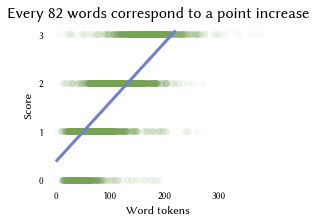

In [7]:
xs = np.arange(1, 220, 1)

plt.figure(figsize=(4, 3))
plotstyle.setup("Every 82 words correspond to a point increase", "Word tokens", "Score")
plt.yticks([0,1,2,3])
plt.scatter(subset["tokens"], subset["score"], color=plotstyle.palette[0], alpha=0.05)
plt.plot(xs, xs * glm.params[1] + glm.params[0], linewidth=3, color=plotstyle.palette[1])
plt.savefig("../graphs/score-length.svg", transparent=True)

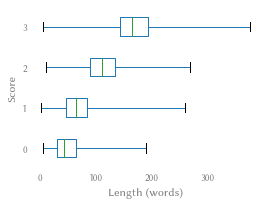

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
essays.boxplot("tokens", by="score", vert=False, ax=ax, grid=False, whis=(0, 100))
plotstyle.setup("", "Length (words)", "Score", ax=ax)
ax.set_yticklabels([0,1,2,3])
fig.suptitle("")

#ax.plot(xs, xs * glm.params[1] + glm.params[0], linewidth=3, color=plotstyle.palette[1])

plt.savefig("../graphs/score-length.svg", transparent=True, bbox_inches="tight")

In [21]:
list(essays[(essays["score"] == 3) & (essays["tokens"] < 50)]["essay"])

['To begin with a feature that affect the cyclist was a lack of water this is shown when the speaker says when I tried a drop or two, it had the flavor of battery acid-thats was one of the biggest factors he had risked. ',
 'The features of the setting affect the cyclist in many ways. It made him tired thirsty and he was near exaustion.',
 ' The features of the setting affect the cyclist because they doubt or lessen his chances for survival, but the cyclist is determined so he survives.',
 'If it’s a good day the cyclist will want to rid. If it is a bad day then they will not want to but probably will.',
 'He is going on a journey on his bike. He has to go down hills and deal with the factt that has has no water. That’s basically what the setting is about.',
 'Reserved need to check keenly',
 'Because she saying when the @CAPS1 grow back she will be @CAPS2 to take the test again.']

In [73]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(include_bias=False, degree=2, interaction_only=True)
X_poly = pf.fit_transform(subset[meta_cols])
subset = pd.concat([
    subset.reset_index(),
    pd.DataFrame(X_poly, columns=pf.get_feature_names(meta_cols))
], axis=1)

In [74]:
subset.corr()["score"].sort_values(ascending=False).head(20)

domain1_score       1.000000
score               1.000000
rater1_domain1      0.937417
rater2_domain1      0.922974
types word_len      0.733261
types freq          0.733100
types               0.731480
types               0.731480
freq pps            0.730446
word_len pps        0.730113
tokens freq         0.729400
tokens word_len     0.728287
pps                 0.724252
pps                 0.724252
tokens              0.720707
tokens              0.720707
tokens types        0.679058
types pps           0.678955
types max_depth     0.667110
tokens max_depth    0.665578
Name: score, dtype: float64

In [42]:
subset[meta_cols]

,tokens,types,sent_len,word_len,freq,semicolons,link_words,pps,max_depth
3583,51.0,28.0,17.000000,4.098039,6.871286,0.0,0.0,55.0,5.0
3584,177.0,97.0,12.642857,4.536723,7.325153,1.0,2.0,215.0,9.0
3585,97.0,59.0,12.125000,4.195876,6.758722,0.0,0.0,108.0,7.0
3586,88.0,55.0,14.666667,3.863636,7.702188,0.0,0.0,94.0,6.0
3587,135.0,67.0,22.500000,4.111111,6.872222,0.0,1.0,149.0,6.0
...,...,...,...,...,...,...,...,...,...
7074,82.0,43.0,20.500000,4.219512,5.790873,0.0,0.0,89.0,8.0
7075,79.0,49.0,13.166667,3.987342,5.564689,0.0,3.0,84.0,5.0
7076,58.0,35.0,19.333333,4.413793,5.696910,0.0,1.0,66.0,7.0
7077,39.0,29.0,19.500000,4.384615,6.977415,0.0,0.0,41.0,6.0


In [35]:
subset.shape

(3496, 113)